In [28]:
# Imports

import os

from gerrychain import Graph, GeographicPartition, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import geopandas as gpd
import numpy as np
from gerrychain.random import random
import copy

from gerrychain import MarkovChain
from gerrychain.constraints import single_flip_contiguous
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept
from gerrychain.metrics import polsby_popper
from gerrychain import constraints
from gerrychain.constraints import no_vanishing_districts

from collections import defaultdict, Counter

import matplotlib.pyplot as plt

import networkx as nx

import pandas

import math

from functools import partial

from itertools import combinations_with_replacement


In [29]:
#set up
county_col = "COUNTY"
pop_col = "TOT_POP"

## Make a 16x16 grid graph and make quadrants into counties

These are the four counties:


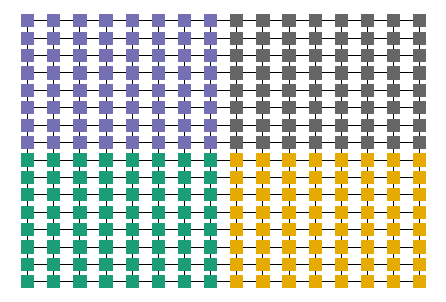

In [30]:

graph = nx.grid_graph([16,16])


for n in graph.nodes():
    graph.node[n]["TOT_POP"] = 1
    #assign to counties in quadrants
    if (n[0] < 8) and (n[1] < 8):
        graph.node[n][county_col] = 0
    if (n[0] < 8) and (n[1] >= 8):
        graph.node[n][county_col] = 1
    if (n[0] >= 8) and (n[1] < 8):
        graph.node[n][county_col] = 2
    if (n[0] >= 8) and (n[1] >= 8):
        graph.node[n][county_col] = 3

print("These are the four counties:")

plt.figure()
nx.draw(
    graph,
    pos={x: x for x in graph.nodes()},
    node_color=[graph.node[x][county_col] for x in graph.nodes()],
    node_size=150,
    node_shape="s",
    cmap="Dark2"
)





## Consider four different districtings into two districts

### 1. Counties nested inside districts
Attribute "district" used for district number

The two districts are: 


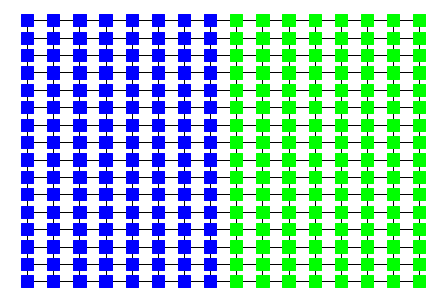

In [31]:
district_matrix = np.array(
    [
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        
    ]
)

assignment1 = {}
for n in graph.nodes():
    assignment1[n] = np.transpose(district_matrix)[n[0]][n[1]]
    
print("The two districts are: ")    
plt.figure()
nx.draw(
    graph,
    pos={x: x for x in graph.nodes()},
    node_color=[assignment1[x] for x in graph.nodes()],
    node_size=150,
    node_shape="s",
    cmap="brg"
)

partition1 = Partition(graph, assignment=assignment1)
        
##...COMPUTE SPLITTING SCORE HERE...

### 2. Each district intersects all the counties 

The two districts are: 


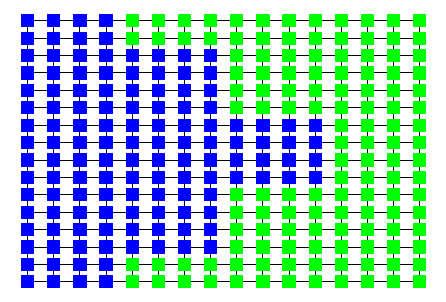

In [32]:
district_matrix = np.array(
    [
        [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1],
        [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
        [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
        [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
        [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1],
        [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1],
        
    ]
)

assignment1 = {}
for n in graph.nodes():
    assignment1[n] = np.transpose(district_matrix)[n[0]][n[1]]
    
print("The two districts are: ")    
plt.figure()
nx.draw(
    graph,
    pos={x: x for x in graph.nodes()},
    node_color=[assignment1[x] for x in graph.nodes()],
    node_size=150,
    node_shape="s",
    cmap="brg"
)

partition2 = Partition(graph, assignment=assignment1)
        
##...COMPUTE SPLITTING SCORE HERE...

### 3. Each district intersects all the counties in snaky ways

The two districts are: 


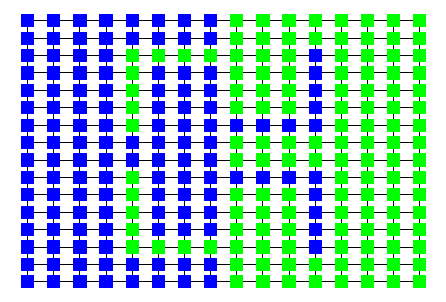

In [20]:
district_matrix = np.array(
    [
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1],
        [0,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1],
        [0,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1],
        [0,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1],
        [0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1],
        [0,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1],
        [0,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1],
        [0,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1],
        [0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        
    ]
)

assignment1 = {}
for n in graph.nodes():
    assignment1[n] = np.transpose(district_matrix)[n[0]][n[1]]
    
print("The two districts are: ")    
plt.figure()
nx.draw(
    graph,
    pos={x: x for x in graph.nodes()},
    node_color=[assignment1[x] for x in graph.nodes()],
    node_size=150,
    node_shape="s",
    cmap="brg"
)

partition3 = Partition(graph, assignment1)
        
##...COMPUTE SPLITTING SCORE HERE...

### 4. Taking nibbles of counties

The two districts are: 


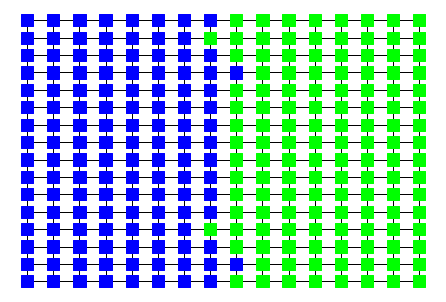

In [23]:
district_matrix = np.array(
    [
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1],
        
    ]
)

assignment1 = {}
for n in graph.nodes():
    assignment1[n] = np.transpose(district_matrix)[n[0]][n[1]]
    
print("The two districts are: ")    
plt.figure()
nx.draw(
    graph,
    pos={x: x for x in graph.nodes()},
    node_color=[assignment1[x] for x in graph.nodes()],
    node_size=150,
    node_shape="s",
    cmap="brg"
)

partition4 = Partition(graph, assignment1)
        
##...COMPUTE SPLITTING SCORE HERE...

### Add your own!